In [153]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.linear_model import LassoCV, RidgeCV
from sklearn.metrics import  mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

In [154]:
import warnings
warnings.filterwarnings('ignore')  # полное отключение всех предупреждений

## Примечание
1.Теорию по визуализации библиотеки seaborn брал из: https://github.com/m-ardat/Library_Seaborn.git

2.Примим, что выручка указана в условных единицах и для простоты не будем указывать размерность на графиках

In [155]:
df = pd.read_csv('D:/ProjectPython/Анализ даных/Волков АД/air_data.xls', sep=';')
df

,ISSUE_DATE,FLIGHT_DATE_LOC,PAX_TYPE,REVENUE_AMOUNT,ORIG_CITY_CODE,DEST_CITY_CODE,ROUTE_FLIGHT_TYPE,FFP_FLAG,SALE_TYPE
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11 00:00:00,2022-06-22 00:00:00,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06 00:00:00,2022-06-20 00:00:00,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26 00:00:00,2022-06-29 00:00:00,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26 00:00:00,2022-06-28 00:00:00,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [156]:
df.columns = ['buy_date', 'fly_date', 'type_pasenger', 'revenue', 'A_city', 'B_city', 'fly_type', 'loyalty', 'sale_type']
df.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
0,2021-12-07 00:00:00,2022-01-11 00:00:00,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31 00:00:00,2022-01-03 00:00:00,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28 00:00:00,2022-01-04 00:00:00,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08 00:00:00,2022-01-05 00:00:00,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08 00:00:00,2022-01-12 00:00:00,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   buy_date       50000 non-null  object
 1   fly_date       50000 non-null  object
 2   type_pasenger  50000 non-null  object
 3   revenue        50000 non-null  int64 
 4   A_city         49998 non-null  object
 5   B_city         49999 non-null  object
 6   fly_type       50000 non-null  object
 7   loyalty        19398 non-null  object
 8   sale_type      50000 non-null  object
dtypes: int64(1), object(8)
memory usage: 3.4+ MB


In [158]:
df['buy_date'] = pd.to_datetime(df['buy_date'], format='%Y-%m-%d %H:%M:%S')
df['fly_date'] = pd.to_datetime(df['fly_date'], format='%Y-%m-%d %H:%M:%S')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   buy_date       50000 non-null  datetime64[ns]
 1   fly_date       50000 non-null  datetime64[ns]
 2   type_pasenger  50000 non-null  object        
 3   revenue        50000 non-null  int64         
 4   A_city         49998 non-null  object        
 5   B_city         49999 non-null  object        
 6   fly_type       50000 non-null  object        
 7   loyalty        19398 non-null  object        
 8   sale_type      50000 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.4+ MB


In [159]:
df.query('A_city.isna()')
df.drop(df.query('A_city.isna()').index, inplace=True)
df

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [160]:
df.query('B_city.isna()')
df.drop(df.query('B_city.isna()').index, inplace=True)
df

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,NaN,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,NaN,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,NaN,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,NaN,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,NaN,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,NaN,OFFLINE


In [161]:
df['loyalty'].unique()

array([nan, 'FFP'], dtype=object)

In [162]:
df['loyalty'].fillna('Нет информации', inplace=True)
df

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,Нет информации,ONLINE
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,Нет информации,OFFLINE
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,Нет информации,ONLINE
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE
...,...,...,...,...,...,...,...,...,...
49995,2022-06-11,2022-06-22,CHD,480,MOW,OMS,ВВЛ,Нет информации,ONLINE
49996,2022-06-06,2022-06-20,AD,270,LED,MOW,ВВЛ,Нет информации,OFFLINE
49997,2022-06-26,2022-06-29,AD,230,MOW,KZN,ВВЛ,FFP,ONLINE
49998,2022-06-26,2022-06-28,AD,270,KZN,MOW,ВВЛ,Нет информации,OFFLINE


In [163]:
df.pivot_table(index='loyalty', aggfunc={'revenue':'mean'})

,revenue
loyalty,
FFP,424.547892
Нет информации,439.531684


In [164]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49997 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   buy_date       49997 non-null  datetime64[ns]
 1   fly_date       49997 non-null  datetime64[ns]
 2   type_pasenger  49997 non-null  object        
 3   revenue        49997 non-null  int64         
 4   A_city         49997 non-null  object        
 5   B_city         49997 non-null  object        
 6   fly_type       49997 non-null  object        
 7   loyalty        49997 non-null  object        
 8   sale_type      49997 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [165]:
print(f'Потеря информации: {(50000-len(df))/50000*100:.3f}% строк от датасета')

Потеря информации: 0.006% строк от датасета


In [166]:
df.duplicated().sum()

169

In [167]:
df[df.duplicated(keep=False)]

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
337,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,FFP,ONLINE
338,2021-10-29,2021-11-12,AD,220,MOW,KZN,ВВЛ,FFP,ONLINE
649,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,Нет информации,OFFLINE
670,2022-02-11,2022-08-03,AD,580,PKC,OVB,ВВЛ,Нет информации,OFFLINE
716,2022-02-08,2022-08-01,AD,360,MMK,MOW,ВВЛ,Нет информации,OFFLINE
...,...,...,...,...,...,...,...,...,...
49360,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,FFP,ONLINE
49424,2022-03-30,2022-05-03,AD,410,MOW,OVB,ВВЛ,FFP,ONLINE
49677,2022-04-02,2022-05-02,AD,470,NUX,MOW,ВВЛ,Нет информации,ONLINE
49968,2022-06-28,2022-06-30,AD,950,MOW,HTA,ВВЛ,Нет информации,OFFLINE


In [168]:
df.drop_duplicates(inplace=True)
df.reset_index()
df.duplicated().sum()

0

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49828 entries, 0 to 49999
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   buy_date       49828 non-null  datetime64[ns]
 1   fly_date       49828 non-null  datetime64[ns]
 2   type_pasenger  49828 non-null  object        
 3   revenue        49828 non-null  int64         
 4   A_city         49828 non-null  object        
 5   B_city         49828 non-null  object        
 6   fly_type       49828 non-null  object        
 7   loyalty        49828 non-null  object        
 8   sale_type      49828 non-null  object        
dtypes: datetime64[ns](2), int64(1), object(6)
memory usage: 3.8+ MB


In [170]:
print(f'Потеря информации: {(50000-len(df))/50000*100:.3f}% строк от датасета')

Потеря информации: 0.344% строк от датасета


In [171]:
df.query('revenue == 0')

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type
13,2021-12-05,2022-01-16,INF,0,PEZ,MOW,ВВЛ,Нет информации,OFFLINE
32,2021-12-08,2022-01-11,INF,0,UFA,MOW,ВВЛ,Нет информации,ONLINE
106,2021-12-05,2022-01-08,INF,0,MOW,UFA,ВВЛ,Нет информации,ONLINE
228,2021-12-04,2022-01-07,INF,0,MOW,AER,ВВЛ,Нет информации,ONLINE
288,2021-10-26,2021-11-02,INF,0,MOW,PEZ,ВВЛ,Нет информации,ONLINE
...,...,...,...,...,...,...,...,...,...
49382,2022-04-09,2022-05-01,INF,0,OVB,AER,ВВЛ,Нет информации,ONLINE
49417,2022-04-01,2022-05-17,INF,0,MOW,KZN,ВВЛ,Нет информации,ONLINE
49482,2021-12-16,2021-12-16,AD,0,OVB,MOW,ВВЛ,Нет информации,OFFLINE
49690,2022-04-15,2022-05-15,INF,0,NYM,MOW,ВВЛ,Нет информации,OFFLINE


In [172]:
df.drop(df.query('revenue == 0').index, inplace=True)

In [173]:
print(f'Потеря информации: {(50000-len(df))/50000*100:.3f}% строк от датасета')

Потеря информации: 1.276% строк от датасета


## Предобработка данных
### Что было сделано:
1. Прочитал датасет, заменил названия столбцов на более удобные, вывел первичную информацию о датафрейме.
2. Изменил типы данных (типизация).
3. На основе информации о датасете начал поиск и удаление пустых строк.
4. Заполнил пустые значения в столбце `['loyalty']` значением `"нет информации"`.
5. Удалил явные дубликаты и строки с нулевой выручкой (в данном анализе такие строки нерелевантны).
6. Рассчитал потерю данных в процентах от исходного датасета после каждого шага удаления.

### Что получилось:
1. Данные оказались достаточно качественными и практически готовыми к анализу.
2. Пустых строк и явных дубликатов было относительно мало. Столбец с лояльностью, скорее всего, является бинарным (участие в программе лояльности есть/нет), но для надёжности пустые значения были заполнены как `"нет информации"`.
3. Неявных дубликатов, вероятно, нет — их обнаружение затруднительно, поскольку коды аэропортов стандартизированы, а остальные столбцы содержат мало уникальных значений (многие из них бинарные).
4. В итоге мы потеряли около **1,5%** исходных данных, что для датасета в 50 000 строк и после предобработки является вполне приемлемым результатом.

In [174]:
df['month'] = df['buy_date'].dt.month
df.head(2)

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,Нет информации,ONLINE,12
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,Нет информации,OFFLINE,12


In [175]:
df['to_month'] = df['buy_date'].dt.to_period('M')
df.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month
0,2021-12-07,2022-01-11,AD,200,MOW,KGD,ВВЛ,Нет информации,ONLINE,12,2021-12
1,2021-12-31,2022-01-03,AD,610,UUS,OVB,ВВЛ,Нет информации,OFFLINE,12,2021-12
2,2021-11-28,2022-01-04,AD,390,KGD,MOW,ВВЛ,FFP,ONLINE,11,2021-11
3,2021-12-08,2022-01-05,AD,190,VOZ,MOW,ВВЛ,Нет информации,ONLINE,12,2021-12
4,2021-12-08,2022-01-12,AD,190,MOW,KRR,ВВЛ,FFP,OFFLINE,12,2021-12


In [176]:
df = df.sort_values('to_month')

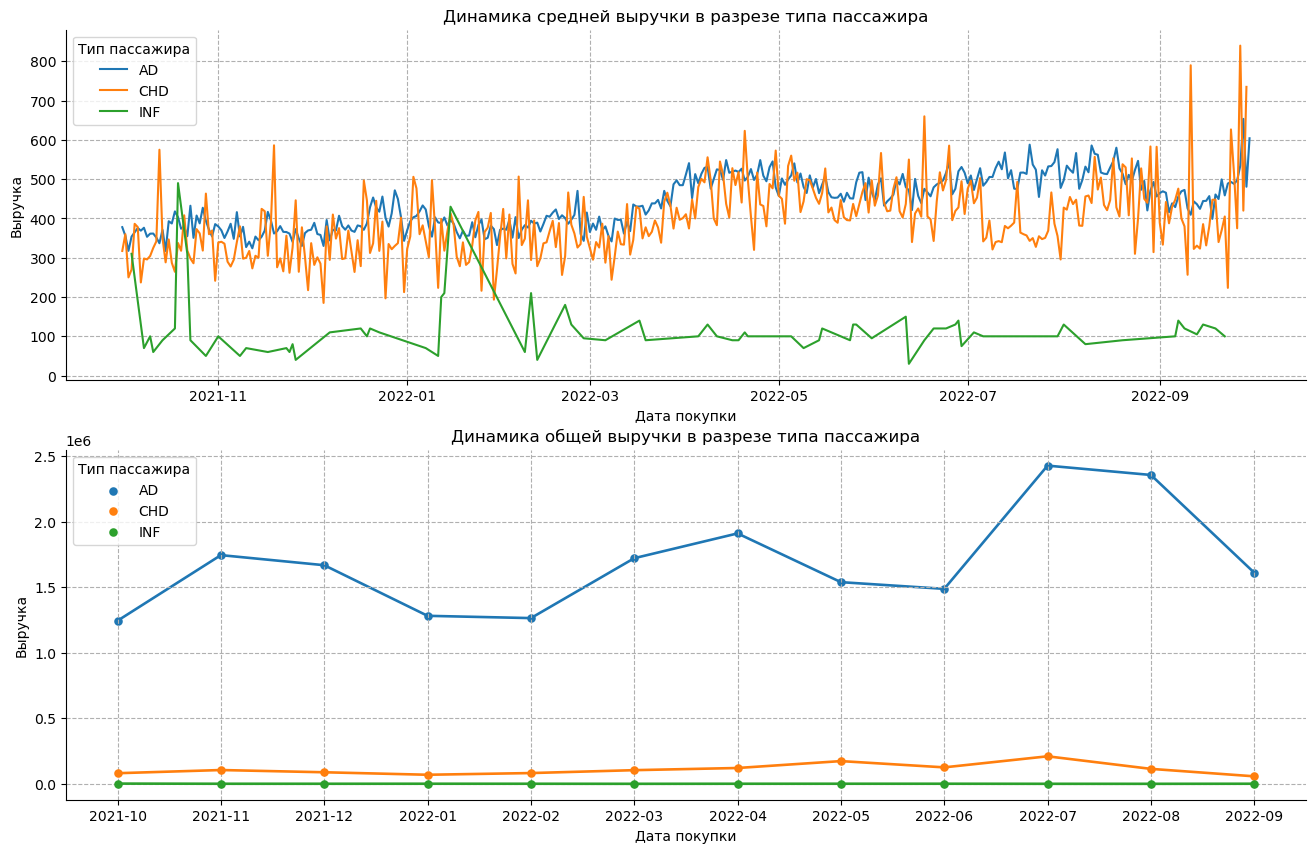

In [177]:
plt.figure(figsize=(16,10))

plt.subplot(2,1,1)
sns.lineplot(df, x='buy_date', y='revenue', errorbar=None, hue='type_pasenger')
plt.title('Динамика средней выручки в разрезе типа пассажира')
plt.xlabel('Дата покупки')
plt.ylabel('Выручка')
plt.legend(title='Тип пассажира')
plt.grid(linestyle='--')
sns.despine()

plt.subplot(2,1,2)
sns.pointplot(df, x='to_month', y='revenue', errorbar=None, scale=0.7, hue='type_pasenger', estimator='sum')
plt.title('Динамика общей выручки в разрезе типа пассажира')
plt.xlabel('Дата покупки')
plt.ylabel('Выручка')
plt.legend(title='Тип пассажира')
plt.grid(linestyle='--')
sns.despine()
plt.show()

In [178]:
df_piv_fly_type = df.pivot_table(index='to_month', columns='fly_type', aggfunc={'revenue':'sum'})
df_piv_fly_type

revenue        
fly_type      ВВЛ     МВЛ
to_month                 
2021-10   1039020  288820
2021-11   1528990  322270
2021-12   1452480  304770
2022-01   1152790  199600
2022-02   1173370  174400
2022-03   1789040   37390
2022-04   1926430  106140
2022-05   1635180   78180
2022-06   1523810   90690
2022-07   2507800  130630
2022-08   2353640  117620
2022-09   1527930  141380

In [179]:
df_piv_loyalty = df.pivot_table(index='to_month', columns='loyalty', aggfunc={'revenue':'sum'})
df_piv_loyalty

revenue               
loyalty      FFP Нет информации
to_month                       
2021-10   502030         825810
2021-11   735100        1116160
2021-12   721010        1036240
2022-01   538540         813850
2022-02   499240         848530
2022-03   801360        1025070
2022-04   764880        1267690
2022-05   649520        1063840
2022-06   590920        1023580
2022-07   973450        1664980
2022-08   906540        1564720
2022-09   539800        1129510

In [180]:
df_piv_sale_type = df.pivot_table(index='to_month', columns='sale_type', aggfunc={'revenue':'sum'})
df_piv_sale_type

revenue         
sale_type  OFFLINE   ONLINE
to_month                   
2021-10     649640   678200
2021-11     901140   950120
2021-12     853050   904200
2022-01     623900   728490
2022-02     670260   677510
2022-03     796020  1030410
2022-04    1035090   997480
2022-05     743570   969790
2022-06     753650   860850
2022-07    1185740  1452690
2022-08    1233350  1237910
2022-09     871490   797820

In [181]:
pd.concat([df_piv_sale_type,df_piv_loyalty,df_piv_fly_type], axis=1)

revenue                                                 
          OFFLINE   ONLINE     FFP Нет информации      ВВЛ     МВЛ
to_month                                                          
2021-10    649640   678200  502030         825810  1039020  288820
2021-11    901140   950120  735100        1116160  1528990  322270
2021-12    853050   904200  721010        1036240  1452480  304770
2022-01    623900   728490  538540         813850  1152790  199600
2022-02    670260   677510  499240         848530  1173370  174400
2022-03    796020  1030410  801360        1025070  1789040   37390
2022-04   1035090   997480  764880        1267690  1926430  106140
2022-05    743570   969790  649520        1063840  1635180   78180
2022-06    753650   860850  590920        1023580  1523810   90690
2022-07   1185740  1452690  973450        1664980  2507800  130630
2022-08   1233350  1237910  906540        1564720  2353640  117620
2022-09    871490   797820  539800        1129510  1527930  141380

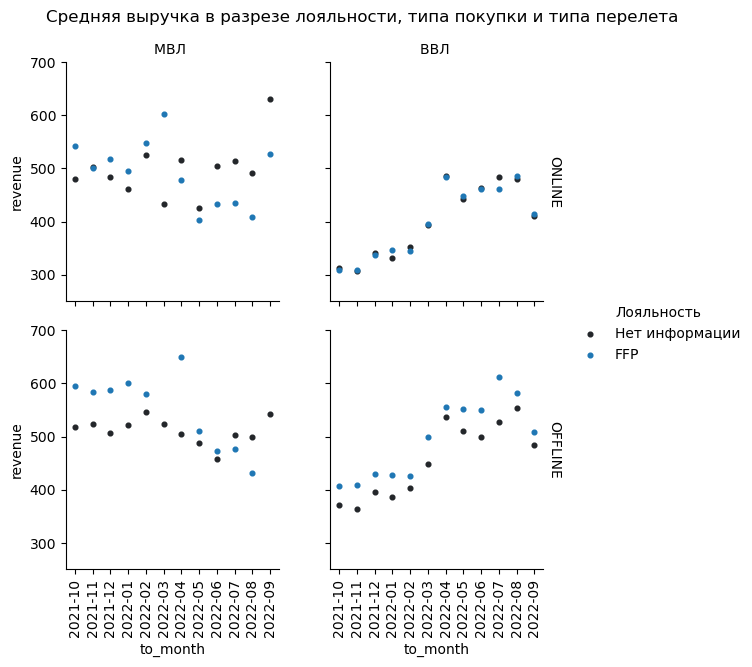

In [182]:
g = sns.FacetGrid(df, row='sale_type', col='fly_type', margin_titles=True, ylim=(250,700), despine=False)
g.map_dataframe(sns.pointplot, x='to_month', y='revenue', hue='loyalty', errorbar=None, scale=0.5, linestyles='none')
g.set_titles(col_template='{col_name} ', row_template='{row_name}')
g.add_legend(title='Лояльность')
g.fig.suptitle("Средняя выручка в разрезе лояльности, типа покупки и типа перелета", y=1.03)
for ax in g.axes.flat:
    ax.tick_params(axis='x', rotation=90)
sns.despine()
plt.show()


## 3.1 Анализ динамики выручки
### Что было сделано:
1. Построил общие графики динамики выручки.
2. Осознал, что детализированный анализ по конкретным датам слишком громоздок и неудобен для восприятия, поэтому добавил столбец с датой, урезанной до начала месяца (использовал функцию, аналогичную применяемой в SQL).
3. Отсортировал данные по месяцам, построил сводные таблицы (pivot tables) и объединил их в единую таблицу для анализа.
4. Визуализировал среднюю выручку на основе данных из сводных таблиц.

### Что получилось:
1. **Сравнение средних чеков:** Взрослые и детские билеты имеют схожие средние стоимости, что указывает на незначительную разницу в цене между ними. Билеты категории "неизвестно" в среднем дешевле — вероятно, к этой группе относятся льготные и детские билеты, не отнесённые к соответствующей категории.
2. **Динамика продаж:** Объёмы продаж взрослых и детских билетов остаются относительно стабильными и находятся на сопоставимом уровне, однако к концу 2022 года наблюдаются выраженные всплески. Для категории "неизвестно" выделяются два аномальных пика, нехарактерных для общей динамики.
3. **Структура выручки:** Основной вклад в общую выручку вносит взрослая аудитория. Уже на этом этапе анализа заметна сезонная или циклическая колеблемость выручки.
4. **Удобство сводной таблицы:** Объединённая сводная таблица позволяет быстро находить суммарную выручку за конкретный месяц с учётом заданных условий (например, тип билета, канал продаж).
5. **Влияние лояльности:** Для всех категорий, кроме международных рейсов, купленных онлайн, наблюдается заметная корреляция между типом лояльности (наличие/отсутствие программы) и объёмами выручки.
6. **Тренд цен:** Средняя стоимость внутренних перелётов демонстрирует рост как для онлайн-, так и для офлайн-продаж в период с конца 2021 по конец 2022 года.

<Axes: xlabel='revenue'>

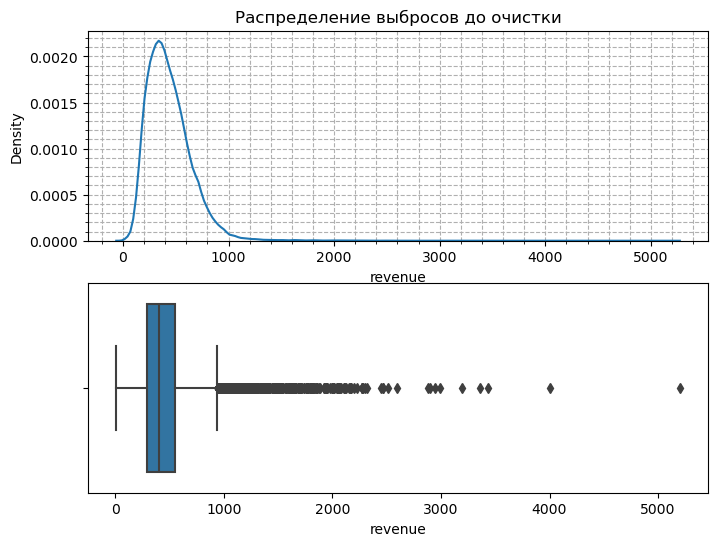

In [183]:
plt.figure(figsize=(8,6))

plt.subplot(2,1,1)
plt.title('Распределение выбросов до очистки')
sns.kdeplot(df['revenue'])
plt.grid(linestyle='--', which='both')
plt.minorticks_on()

plt.subplot(2,1,2)
sns.boxplot(x=df['revenue'])


In [184]:
df['revenue_normalize'] = (df['revenue'] - df['revenue'].mean())/df['revenue'].std()
df

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036
19029,2021-10-06,2021-10-15,AD,220,MOW,AAQ,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.014073
19030,2021-10-06,2021-10-14,AD,350,LED,OVB,ВВЛ,FFP,ONLINE,10,2021-10,-0.408327
19031,2021-10-13,2021-10-14,AD,460,UUS,VVO,ВВЛ,FFP,ONLINE,10,2021-10,0.104228
19032,2021-10-13,2021-10-18,AD,150,TOF,OVB,ВВЛ,FFP,ONLINE,10,2021-10,-1.340244
...,...,...,...,...,...,...,...,...,...,...,...,...
12812,2022-09-14,2022-09-20,AD,320,MOW,PEE,ВВЛ,Нет информации,OFFLINE,9,2022-09,-0.548114
12813,2022-09-24,2022-09-26,AD,280,LED,MOW,ВВЛ,Нет информации,ONLINE,9,2022-09,-0.734498
12814,2022-09-08,2022-09-11,AD,220,VVO,UUS,ВВЛ,FFP,ONLINE,9,2022-09,-1.014073
12807,2022-09-24,2022-09-27,AD,800,OVB,KQT,МВЛ,Нет информации,OFFLINE,9,2022-09,1.688486


<Axes: xlabel='revenue_normalize'>

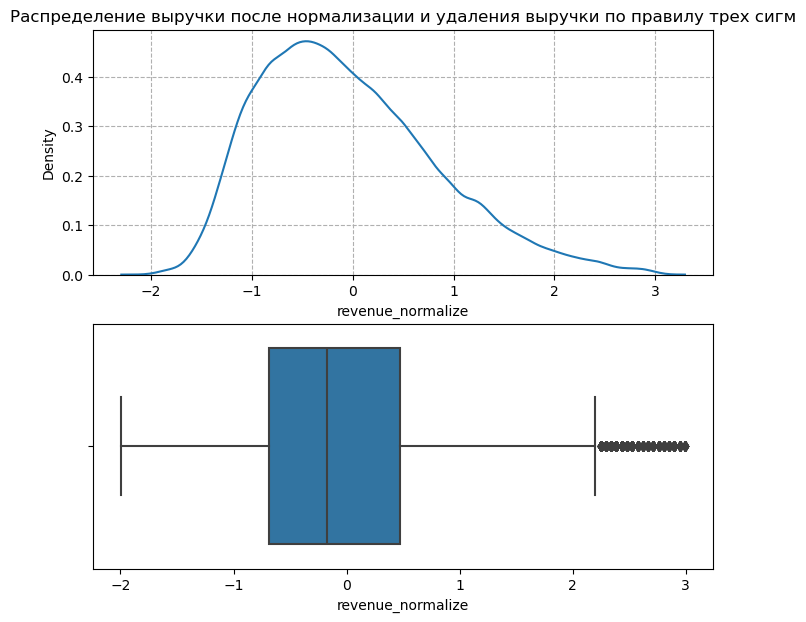

In [185]:
plt.figure(figsize=(8, 7))

plt.subplot(2,1,1)
plt.title('Распределение выручки после нормализации и удаления выручки по правилу трех сигм')
sns.kdeplot(df_clean_revenue_normalize['revenue_normalize'])
plt.grid(linestyle='--', which='both')

plt.subplot(2,1,2)
sns.boxplot(x=df_clean_revenue_normalize['revenue_normalize'])

In [186]:
print(f'Процент потери данных\строк через нормализацию и 3 сигмы: {round((len(df)-len(df_clean_revenue_normalize))/len(df)*100, 3)} %')

Процент потери данных\строк через нормализацию и 3 сигмы: 0.94 %


Text(0.5, 1.0, 'Выбросы после урезки по длине усов')

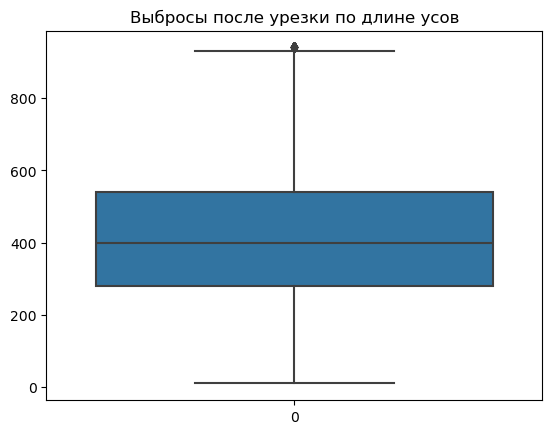

In [187]:
per_75 = df['revenue'].describe()['75%']
per_25 = df['revenue'].describe()['25%']
df_clean = df.query('- 1.5*(@per_75 - @per_25) - @per_25 <= revenue <= @per_75 + 1.5*(@per_75 - @per_25)')
sns.boxplot(df_clean['revenue'])
plt.title('Выбросы после урезки по длине усов')

In [188]:
print(f'Процент потери данных\строк через концы усов: {round((len(df)-len(df_clean))/len(df)*100, 3)} %')

Процент потери данных\строк через концы усов: 2.0 %


## 3.2 Обработка выбросов
### Что было сделано:
1. Построил диаграмму "ящик с усами" (boxplot) для анализа выручки и попытался исключить выбросы по правилу трёх сигм после нормализации данных.
2. Осознал, что процент потери данных при таком подходе слишком велик для принципа "минимизации потерь", поэтому решил применить альтернативный метод.
3. Построил диаграмму "ящик с усами" для выручки и исключил выбросы, используя метод на основе межквартильного размаха (IQR) — границы на уровне 1.5 IQR от квартилей. Также рассчитал процент потери данных для этого метода.
4. Важно отметить, что данные не были удалены безвозвратно — был создан срез датасета. Это оставляет возможность использовать исходные данные с выбросами в дальнейшем анализе, если это потребуется.

### Что получилось:
1. Метод трёх сигм удаляет **меньше выбросов** по сравнению с методом межквартильного размаха (0.94% против 2% потери данных соответственно).
2. При выборе между методами, удаляющими 0.94% и 2% данных, предпочтение было отдано более тщательному очищению датасета, несмотря на бóльшую потерю данных, так как качество данных важнее их количества для последующего анализа.
3. Разница в результатах между этими двумя подходами может оказать существенное влияние на последующий анализ, поэтому выбор метода обработки выбросов должен быть осознанным и соответствовать целям исследования.

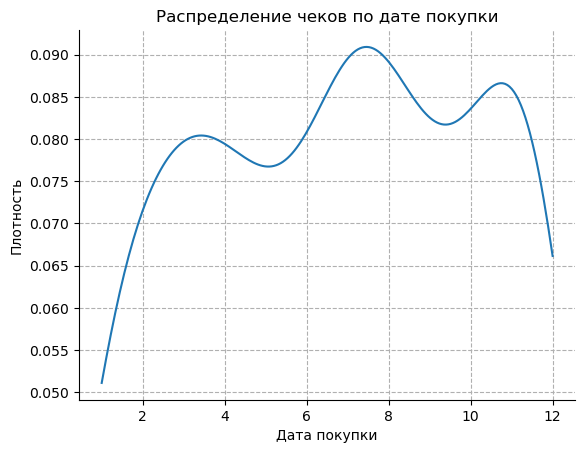

In [189]:
sns.kdeplot(df_clean, x='month', bw_method=0.3, cut=0)
plt.title('Распределение чеков по дате покупки')
plt.xlabel('Дата покупки')
plt.ylabel('Плотность')
plt.grid(linestyle='--')
sns.despine()
plt.show()

In [190]:
moth_to_season = {1:'Зима',2:'Зима',3:"Весна",4:"Весна",5:"Весна",6:'Лето',7:'Лето',8:'Лето',9:'Осень',10:'Осень',11:'Осень',12:'Зима'}
df_clean['season'] = df_clean['month'].map(moth_to_season)
df_clean.sort_values('to_month', inplace=True)
df_clean

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,2022-09-16,2022-10-02,AD,320,MOW,KGD,ВВЛ,Нет информации,ONLINE,9,2022-09,-0.548114,Осень
32036,2022-09-17,2022-10-03,AD,480,MOW,NJC,ВВЛ,Нет информации,OFFLINE,9,2022-09,0.197419,Осень
18551,2022-09-06,2022-09-11,AD,330,PEZ,MOW,ВВЛ,FFP,ONLINE,9,2022-09,-0.501518,Осень
18575,2022-09-07,2022-09-24,AD,460,KQT,OVB,МВЛ,Нет информации,ONLINE,9,2022-09,0.104228,Осень


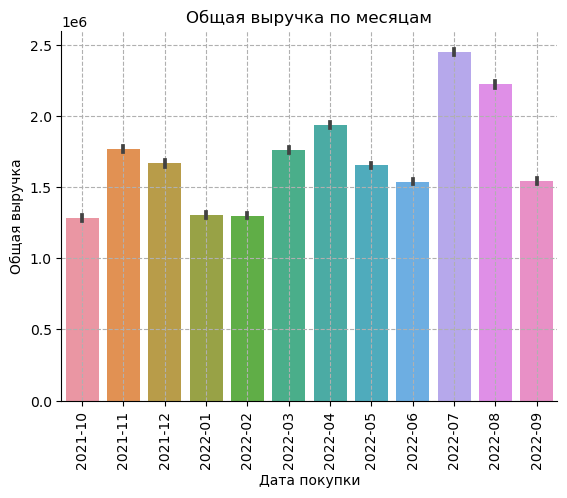

In [191]:
sns.barplot(df_clean, x='to_month', y='revenue', estimator='sum')
plt.xticks(rotation=90)
plt.title('Общая выручка по месяцам')
plt.xlabel('Дата покупки')
plt.ylabel('Общая выручка')
plt.grid(linestyle='--')
sns.despine()
plt.show()

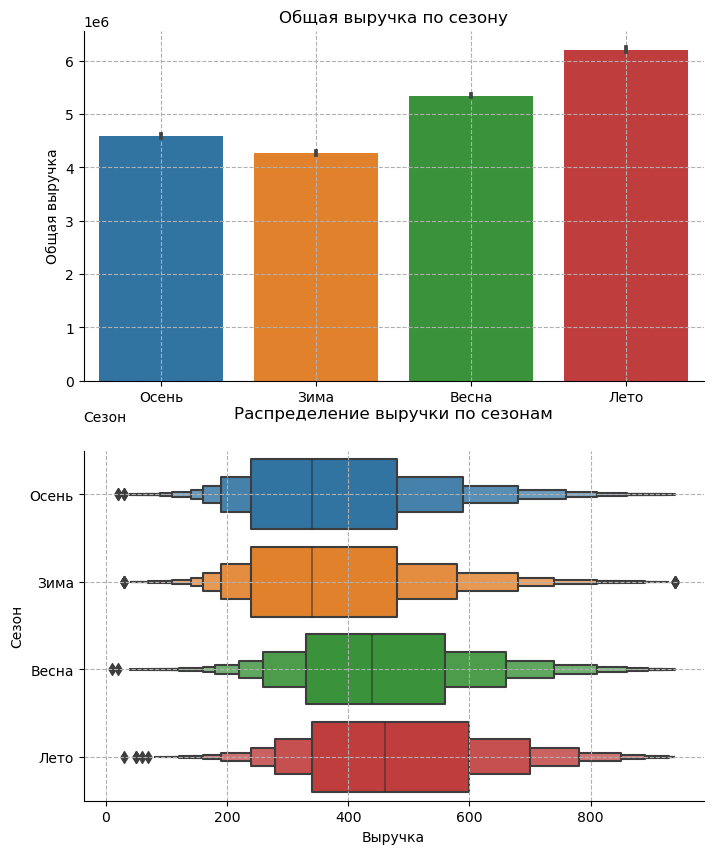

In [192]:
plt.figure(figsize=(8,10))

plt.subplot(2,1,1)
sns.barplot(df_clean, x='season', y='revenue', estimator='sum')
plt.title('Общая выручка по сезону')
plt.xlabel('Сезон', loc='left')
plt.ylabel('Общая выручка')
plt.grid(linestyle='--')
sns.despine()

plt.subplot(2,1,2)
sns.boxenplot(df_clean, y='season', x='revenue')
plt.title('Распределение выручки по сезонам', y=1.07)
plt.xlabel('Выручка')
plt.ylabel('Сезон')
plt.grid(linestyle='--')
sns.despine()
plt.show()

<Figure size 1400x600 with 0 Axes>

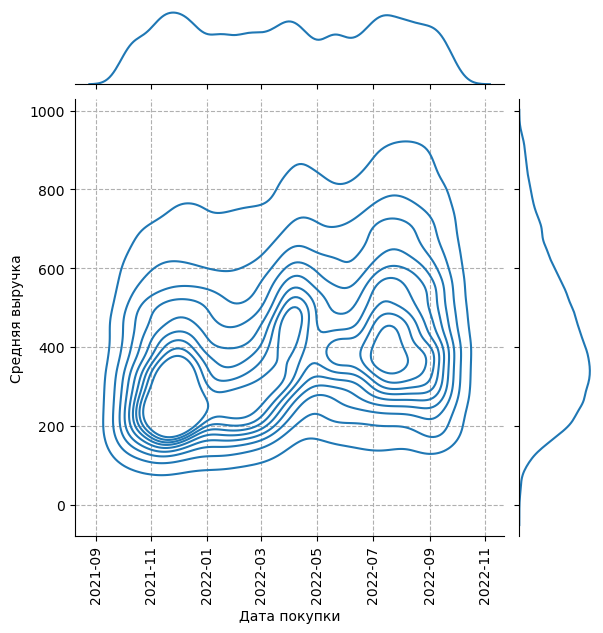

In [193]:
plt.figure(figsize=(14,6))
sns.jointplot(df_clean, x='buy_date', y='revenue', kind='kde')
plt.xticks(rotation=90)
plt.xlabel('Дата покупки')
plt.ylabel('Средняя выручка')
plt.grid(linestyle='--')
plt.show()

In [194]:
# H0: Средняя выручка зимой статичстически не отличается от средней выручки летом 
# H1: Среднее выручка летом статистически значима и больше средней выручки зимой
alpha = 0.05

group_winter = df_clean.query('season == "Зима"')['revenue']
group_spring = df_clean.query('season == "Лето"')['revenue']

if st.ttest_ind(group_winter, group_spring, alternative='less').pvalue < alpha:
    print('Отвергаем нулевую гипотезу: средние выручки статитсически отличаются и летом средняя выручка группы больше')
else:
    print('На данном уровне значимости мы не можем отверннуть нулевую гипотезу о значимом отличие средних групп')


Отвергаем нулевую гипотезу: средние выручки статитсически отличаются и летом средняя выручка группы больше


In [195]:
# H0_w_sг: Средняя выручка зимой статичстически не отличается от средней выручки летом 
# H1: Средние выручки зимой и летом статистически различаются

# H0_sp_a: Средняя выручка летом статичстически не отличается от средней выручки осенью 
# H1: Средние выручки летом и осенью статистически различаются

# H0_a_sp: Средняя выручка осенью статичстически не отличается от средней выручки весной 
# H1: Средние выручки осенью и весной статистически различаются

# H0_sp_w: Средняя выручка весной статичстически не отличается от средней выручки зимой 
# H1: Средние выручки весной и зимой статистически различаются

alpha_beferoni = alpha/4

group_winter = df_clean.query('season == "Зима"')['revenue']
group_summer = df_clean.query('season == "Лето"')['revenue']
group_authm = df_clean.query('season == "Осень"')['revenue']
group_spring = df_clean.query('season == "Весна"')['revenue']

print(f'Размеры групп: {len(group_winter), len(group_summer), len(group_authm), len(group_spring)}')

if st.ttest_ind(group_winter, group_summer).pvalue < alpha_beferoni:
    print('Отвергаем нулевую гипотезу: средние выручки статитсически отличаются летом и зимой')
else:
    print('На данном уровне значимости мы не можем отверннуть нулевую гипотезу о значимом отличие средних групп')

if st.ttest_ind(group_summer, group_authm).pvalue < alpha_beferoni:
    print('Отвергаем нулевую гипотезу: средние выручки статитсически отличаются осенью и летом')
else:
    print('На данном уровне значимости мы не можем отверннуть нулевую гипотезу о значимом отличие средних групп')

if st.ttest_ind(group_authm, group_spring).pvalue < alpha_beferoni:
    print('Отвергаем нулевую гипотезу: средние выручки статитсически отличаются весной и осенью')
else:
    print('На данном уровне значимости мы не можем отверннуть нулевую гипотезу о значимом отличие средних групп')

if st.ttest_ind(group_spring, group_winter).pvalue < alpha_beferoni:
    print('Отвергаем нулевую гипотезу: средние выручки статитсически отличаются весной и зимой')
else:
    print('На данном уровне значимости мы не можем отверннуть нулевую гипотезу о значимом отличие средних групп')



Размеры групп: (11456, 12951, 12243, 11725)
Отвергаем нулевую гипотезу: средние выручки статитсически отличаются летом и зимой
Отвергаем нулевую гипотезу: средние выручки статитсически отличаются осенью и летом
Отвергаем нулевую гипотезу: средние выручки статитсически отличаются весной и осенью
Отвергаем нулевую гипотезу: средние выручки статитсически отличаются весной и зимой


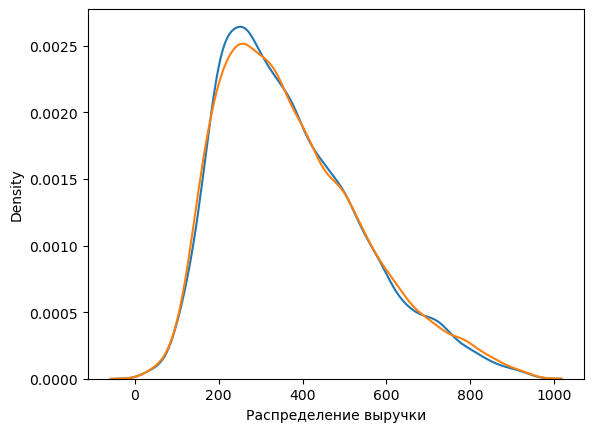

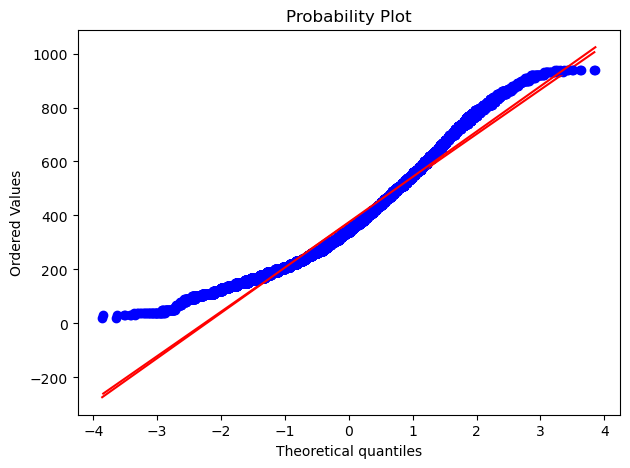

In [196]:
sns.kdeplot(group_winter)
sns.kdeplot(group_authm)
plt.xlabel('Распределение выручки')

plt.figure(figsize = (7, 5))
st.probplot(group_winter, dist='norm', plot=plt)
st.probplot(group_authm, dist='norm', plot=plt)

plt.show()

In [197]:
# H0: Статистически значимой разницы между выручкой зимы и осени, при предположении ненормальности распределения, нет 
# H1: Существует статистически значимая разница между выручкой зимы и осени, при предположении ненормальности распределения 

alpha = 0.05 
results = st.mannwhitneyu(group_winter, group_authm)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print('Следует отвергнуть нулевую гипотезу об отсутствии статистически значимой разницы в сезонах') 
else:
    print('Не удалось отвергнуть нулевую гипотезу об отстуттствии статистически значимой разницы в сезонах') 

p-value: 0.4549933504837227
Не удалось отвергнуть нулевую гипотезу об отстуттствии статистически значимой разницы в сезонах


In [198]:
df_corr = df_clean.pivot_table(index='to_month',  values='revenue', aggfunc=['sum', 'count'])
df_corr.columns = ['revenue_sum', 'revenue_count']
df_corr = df_corr.reset_index()
df_corr

,to_month,revenue_sum,revenue_count
0,2021-10,1280870,3579
1,2021-11,1766940,5109
2,2021-12,1666010,4490
3,2022-01,1304090,3552
4,2022-02,1297190,3414
5,2022-03,1759960,4275
6,2022-04,1934200,3887
7,2022-05,1651680,3563
8,2022-06,1538600,3287
9,2022-07,2447960,5093


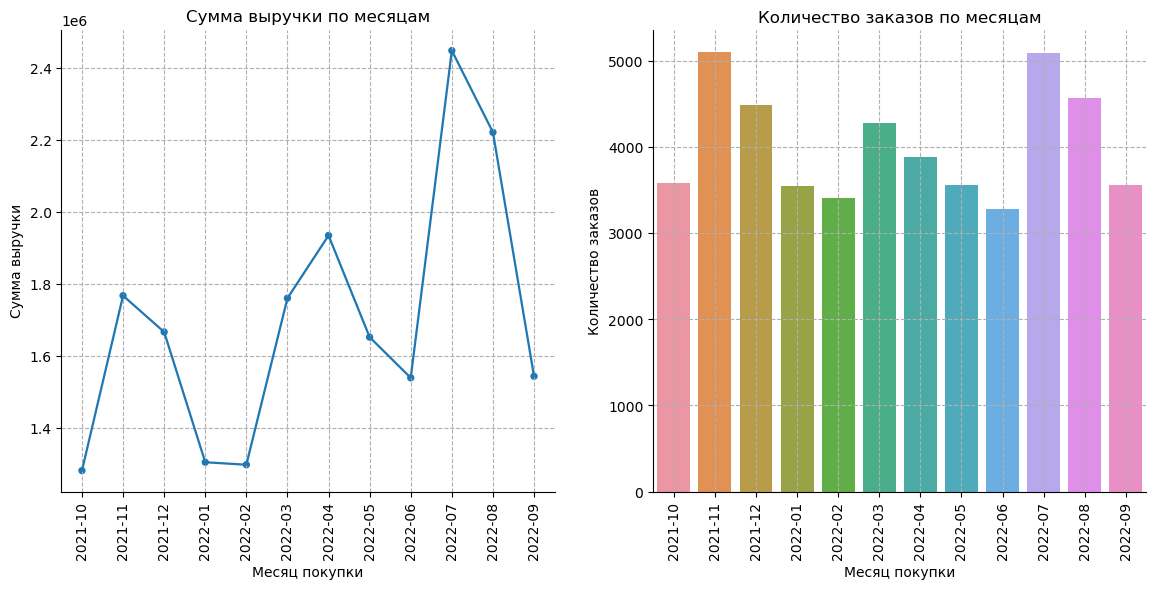

In [199]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
sns.pointplot(df_corr, x='to_month', y='revenue_sum', estimator='sum', scale=0.6)
plt.xticks(rotation=90)
plt.title('Сумма выручки по месяцам')
plt.xlabel('Месяц покупки')
plt.ylabel('Сумма выручки')
plt.grid(linestyle='--')
sns.despine()

plt.subplot(1,2,2)
sns.barplot(df_corr, x='to_month', y='revenue_count', estimator='sum')
plt.xticks(rotation=90)
plt.title('Количество заказов по месяцам')
plt.xlabel('Месяц покупки')
plt.ylabel('Количество заказов')
plt.grid(linestyle='--')
sns.despine()

plt.show()

               revenue_sum  revenue_count
revenue_sum       1.000000       0.753134
revenue_count     0.753134       1.000000


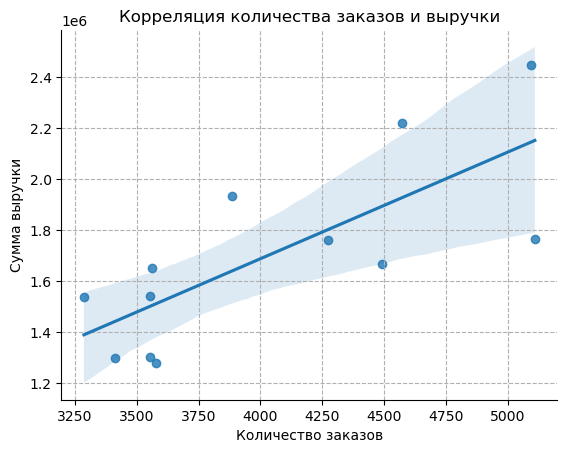

In [200]:
sns.regplot(df_corr, x='revenue_count', y='revenue_sum')
print(df_corr[['revenue_sum', 'revenue_count']].corr())
plt.title('Корреляция количества заказов и выручки')
plt.xlabel('Количество заказов')
plt.ylabel('Сумма выручки')
plt.grid(linestyle='--')
sns.despine()
plt.show()

## 3.3
### Что сделал:
1. Построил плотность распределения числа покупок от месяца для первичной оценки тенденций (специальным методом мы можем менять "чувствительность" для лучшей оценки)
2. Построил столбчатую диаграмму по месяцам
3. Построид двумерную плотность распределения для даты покупки и выручкой
4. Категорезировал данные по сезонам
5. Прстроил ящики с усами и столбчатые графики для сезонов
6. Выдвинул и проверил одиночеую гипотезу и группу гипотез с попрвкуй Бенфферони о средних по сезонам
7. По непараметрическому тесту проверили, что распределение в группах зимы и осени не совсем нормально
8. Провели непараметрический тест Манна-Уитни для зимы и осени
9. Построил графики корреляции и матрицу для суммы выручки и количеством покупок

### Что получил:
1. По графику плотности виден пик в летние месяцы
2. По столбчатой диаграмме и ящику с усам виден отрыв летнего сезона как по суммарной выручке, так и по среднему чеку
3. По двумерной плотности видны пики в декабре 2021 и августе 2022 года со средней выручкой около 300
4. Проверка гипотез дала значимое отличие групп даже с поправкой Бенфферони, возможно, отвержение нулевой гипотезы из-за большого количества данных
5. По тесту Манни-Уитни выручки осенью и зимой не отличаются
6. Найденные ранее пики подтверждаются графиками количества заказов и общей суммой
7. Корреляция между данными показателями получилась тесной, но предсказывать общую выручку по количеству заказов не рекомендовал бы
8. Общий итог, прослеживается значимая сезонность в данных
9. Сильных за 95 % перцентиль выбросов по сезонам, мы впоследствии увидим, что не наблюдалось, поэтому удаления не требуется, но разные результаты тестов настараживают

In [201]:
df_clean.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень


In [202]:
df_clean['datediff'] = (df['fly_date'] - df['buy_date']).dt.days
df_clean

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,2022-09-16,2022-10-02,AD,320,MOW,KGD,ВВЛ,Нет информации,ONLINE,9,2022-09,-0.548114,Осень,16
32036,2022-09-17,2022-10-03,AD,480,MOW,NJC,ВВЛ,Нет информации,OFFLINE,9,2022-09,0.197419,Осень,16
18551,2022-09-06,2022-09-11,AD,330,PEZ,MOW,ВВЛ,FFP,ONLINE,9,2022-09,-0.501518,Осень,5
18575,2022-09-07,2022-09-24,AD,460,KQT,OVB,МВЛ,Нет информации,ONLINE,9,2022-09,0.104228,Осень,17


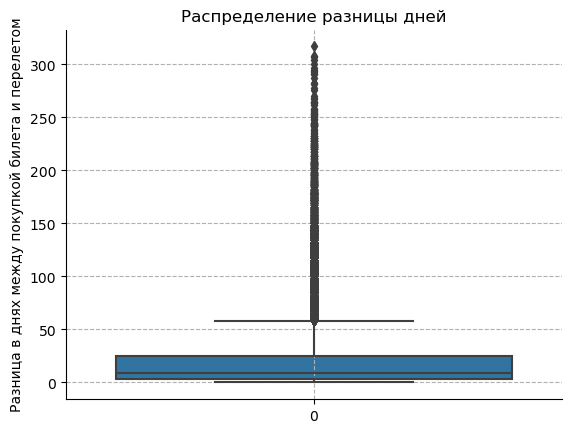

In [203]:
sns.boxplot(df_clean['datediff'])
plt.title('Распределение разницы дней')
plt.ylabel('Разница в днях между покупкой билета и перелетом')
plt.grid(linestyle='--')
sns.despine()
plt.show()

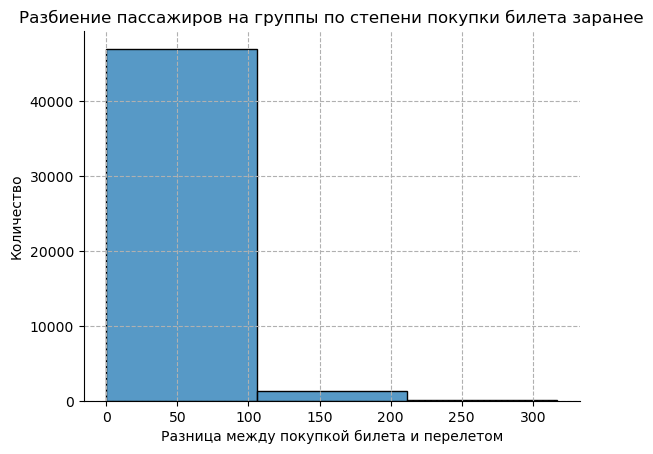

In [204]:
sns.histplot(df_clean,x='datediff', bins=3)
plt.title('Разбиение пассажиров на группы по степени покупки билета заранее')
plt.xlabel('Разница между покупкой билета и перелетом')
plt.ylabel('Количество')
plt.grid(linestyle='--')
sns.despine()
plt.show()

In [205]:
group_raniy = df_clean.query('datediff >= 200')['revenue']
group_sredniy = df_clean.query('100 <= datediff < 200')['revenue']
group_posdniy = df_clean.query('datediff < 100')['revenue']

# H0_r_s: Среднии выручки между ранними и средними группами покупки билетов статистически не различаются
# Н1: Среднии выручки между ранней и средней группами покупки билетов статистически различаются

# H0_s_p: Среднии выручки между средней и поздней группами покупки билетов статистически не различаются
# Н1: Среднии выручки между средней и поздней группами покупки билетов статистически различаются

# H0_r_s: Среднии выручки между поздними и ранними группами покупки билетов статистически не различаются
# Н1: Среднии выручки между поздней и ранней группами покупки билетов статистически различаются

alpha_beferoni_4 = alpha/3

if st.ttest_ind(group_raniy, group_sredniy).pvalue < alpha_beferoni_4:
    print('Отвергаем нулевую гипотезу об отсутсвие статистических различий между средними ранней и средней группами покупки билетов')
else:
    print('Нет оснований отвергнуть нулевую гипотезу об отсутвие статистических различий между средними ранней и средней группами покупки билетов')

if st.ttest_ind(group_posdniy, group_sredniy).pvalue < alpha_beferoni_4:
    print('Отвергаем нулевую гипотезу об отсутсвие статистических различий между средними средней и поздней группами покупки билетов')
else:
    print('Нет оснований отвергнуть нулевую гипотезу об отсутвие статистических различий между средними средней и поздней группами покупки билетов')

if st.ttest_ind(group_raniy, group_posdniy).pvalue < alpha_beferoni_4:
    print('Отвергаем нулевую гипотезу об отсутсвие статистических различий между средними поздней и ранней группами покупки билетов')
else:
    print('Нет оснований отвергнуть нулевую гипотезу об отсутвие статистических различий между средними поздней и ранней группами покупки билетов')

Нет оснований отвергнуть нулевую гипотезу об отсутвие статистических различий между средними ранней и средней группами покупки билетов
Отвергаем нулевую гипотезу об отсутсвие статистических различий между средними средней и поздней группами покупки билетов
Нет оснований отвергнуть нулевую гипотезу об отсутвие статистических различий между средними поздней и ранней группами покупки билетов


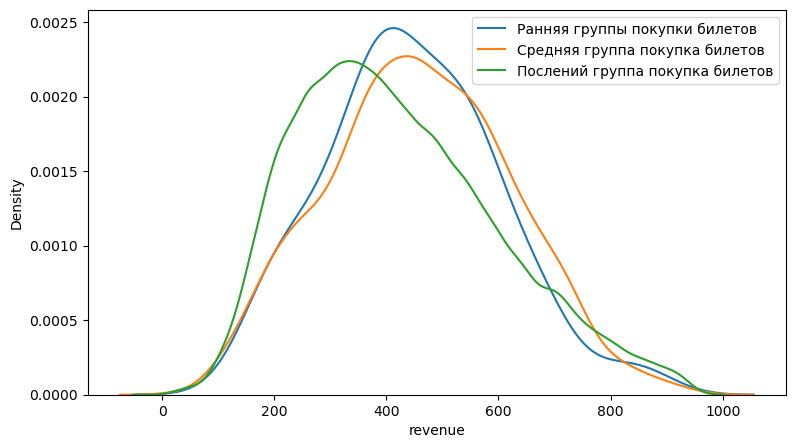

In [206]:
plt.figure(figsize=(9,5))
sns.kdeplot(group_raniy, label='Ранняя группы покупки билетов')
sns.kdeplot(group_sredniy, label='Средняя группа покупка билетов')
sns.kdeplot(group_posdniy, label='Послений группа покупка билетов')

plt.legend()

## 3.4

### **Что сделал:**

1. **Добавил столбец разности** между покупкой билета и самим полётом в днях
2. **Разбил покупателей на 3 группы** по гистограмме через бины — наиболее простой и правильный способ, ведь суть бинов и заключается в разбивке данных
3. **Проверил группу гипотез** с поправкой Бонферрони для уменьшения ошибки первого рода

### **Что получил:**

1. Получил **3 группы пассажиров** с интервалами в 100 дней
2. Из проверки гипотез можно сделать вывод, что **статистическая разница в средних** наблюдается только между выручкой групп **средней и поздней покупкой** билетов. Возможно, именно в интервале 100 дней наблюдается существенная разница в цене билета.

In [207]:
column_names = ['Airport Name', 'Location', 'Country', 'IATA_Code', 'ICAO_Code', 'Latitude', 'Longitude', 'Altitude', 'Timezone', 'DST', 'Timezone Region', 'Type', 'Source']
df_city = pd.read_csv('https://raw.githubusercontent.com/jpatokal/openflights/master/data/airports.dat', header=None, names=column_names)
df_city

,Airport Name,Location,Country,IATA_Code,ICAO_Code,Latitude,Longitude,Altitude,Timezone,DST,Timezone Region,Type,Source
1,Goroka Airport,Goroka,Papua New Guinea,GKA,AYGA,-6.081690,145.391998,5282,10,U,Pacific/Port_Moresby,airport,OurAirports
2,Madang Airport,Madang,Papua New Guinea,MAG,AYMD,-5.207080,145.789001,20,10,U,Pacific/Port_Moresby,airport,OurAirports
3,Mount Hagen Kagamuga Airport,Mount Hagen,Papua New Guinea,HGU,AYMH,-5.826790,144.296005,5388,10,U,Pacific/Port_Moresby,airport,OurAirports
4,Nadzab Airport,Nadzab,Papua New Guinea,LAE,AYNZ,-6.569803,146.725977,239,10,U,Pacific/Port_Moresby,airport,OurAirports
5,Port Moresby Jacksons International Airport,Port Moresby,Papua New Guinea,POM,AYPY,-9.443380,147.220001,146,10,U,Pacific/Port_Moresby,airport,OurAirports
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14106,Rogachyovo Air Base,Belaya,Russia,\N,ULDA,71.616699,52.478298,272,\N,\N,\N,airport,OurAirports
14107,Ulan-Ude East Airport,Ulan Ude,Russia,\N,XIUW,51.849998,107.737999,1670,\N,\N,\N,airport,OurAirports
14108,Krechevitsy Air Base,Novgorod,Russia,\N,ULLK,58.625000,31.385000,85,\N,\N,\N,airport,OurAirports
14109,Desierto de Atacama Airport,Copiapo,Chile,CPO,SCAT,-27.261200,-70.779198,670,\N,\N,\N,airport,OurAirports


In [208]:
df_city.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7698 entries, 1 to 14110
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Airport Name     7698 non-null   object 
 1   Location         7649 non-null   object 
 2   Country          7698 non-null   object 
 3   IATA_Code        7698 non-null   object 
 4   ICAO_Code        7698 non-null   object 
 5   Latitude         7698 non-null   float64
 6   Longitude        7698 non-null   float64
 7   Altitude         7698 non-null   int64  
 8   Timezone         7698 non-null   object 
 9   DST              7698 non-null   object 
 10  Timezone Region  7698 non-null   object 
 11  Type             7698 non-null   object 
 12  Source           7698 non-null   object 
dtypes: float64(2), int64(1), object(10)
memory usage: 842.0+ KB


In [209]:
df_city['IATA_Code'].nunique()

6073

In [210]:
df_clean

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,2022-09-16,2022-10-02,AD,320,MOW,KGD,ВВЛ,Нет информации,ONLINE,9,2022-09,-0.548114,Осень,16
32036,2022-09-17,2022-10-03,AD,480,MOW,NJC,ВВЛ,Нет информации,OFFLINE,9,2022-09,0.197419,Осень,16
18551,2022-09-06,2022-09-11,AD,330,PEZ,MOW,ВВЛ,FFP,ONLINE,9,2022-09,-0.501518,Осень,5
18575,2022-09-07,2022-09-24,AD,460,KQT,OVB,МВЛ,Нет информации,ONLINE,9,2022-09,0.104228,Осень,17


In [211]:
df_slovar = df_clean.merge(df_city, left_on='A_city', right_on='IATA_Code')[['A_city', 'Location']].drop_duplicates().sort_values('A_city').reset_index().drop('index', axis=1).set_index('A_city')['Location']
df_slovar = pd.concat([df_slovar, pd.Series(['Moscow'], index=['MOW'])])
df_slovar

AAQ          Anapa
ABA         Abakan
AER          Sochi
ALA       Alma-ata
ALC       Alicante
          ...     
VRN    Villafranca
VVO    Vladivostok
YKS        Yakutsk
ZRH         Zurich
MOW         Moscow
Length: 132, dtype: object

In [212]:
df_clean['A_B'] = df_clean['A_city'] + df_clean['B_city']
df_clean.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff,A_B
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9,OVBOSS
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9,MOWKZN
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8,MOWSIP
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7,AERMOW
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2,MOWKRR


In [213]:
df_clean['A_B_city'] = df_clean['A_B'].str[0:3].map(df_slovar).astype(str) + '-' + df_clean['A_B'].str[3:6].map(df_slovar).astype(str)
df_clean.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff,A_B,A_B_city
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9,OVBOSS,Novosibirsk-Osh
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9,MOWKZN,Moscow-Kazan
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8,MOWSIP,Moscow-Simferopol
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7,AERMOW,Sochi-Moscow
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2,MOWKRR,Moscow-Krasnodar


In [214]:
df_top = df_clean['A_B_city'].value_counts().head(10)
df_top

A_B_city
Sochi-Moscow             1326
Moscow-Sochi             1292
St. Petersburg-Moscow    1211
Moscow-St. Petersburg    1190
Novosibirsk-Moscow        967
Moscow-Novosibirsk        944
Kazan-Moscow              759
Moscow-Kazan              757
Moscow-Ufa                708
Novosibirsk-Sochi         668
Name: count, dtype: int64

In [215]:
df_top_mvl = df_clean.query('fly_type == "МВЛ"')['A_B_city'].value_counts().head(10)
df_top_mvl

A_B_city
Moscow-Osh               151
Khudzhand-Moscow         144
Osh-Moscow               136
Moscow-Khudzhand         129
Novosibirsk-Bishkek      120
Novosibirsk-Osh          119
Khudzhand-Novosibirsk    116
Osh-Novosibirsk          115
Bishkek-Novosibirsk      102
Moscow-Antalya           101
Name: count, dtype: int64

In [216]:
df_top_vvl = df_clean.query('fly_type == "ВВЛ"')['A_B_city'].value_counts().head(10)
df_top_vvl

A_B_city
Sochi-Moscow             1326
Moscow-Sochi             1292
St. Petersburg-Moscow    1211
Moscow-St. Petersburg    1190
Novosibirsk-Moscow        967
Moscow-Novosibirsk        944
Kazan-Moscow              759
Moscow-Kazan              757
Moscow-Ufa                708
Novosibirsk-Sochi         668
Name: count, dtype: int64

<Figure size 1100x500 with 0 Axes>

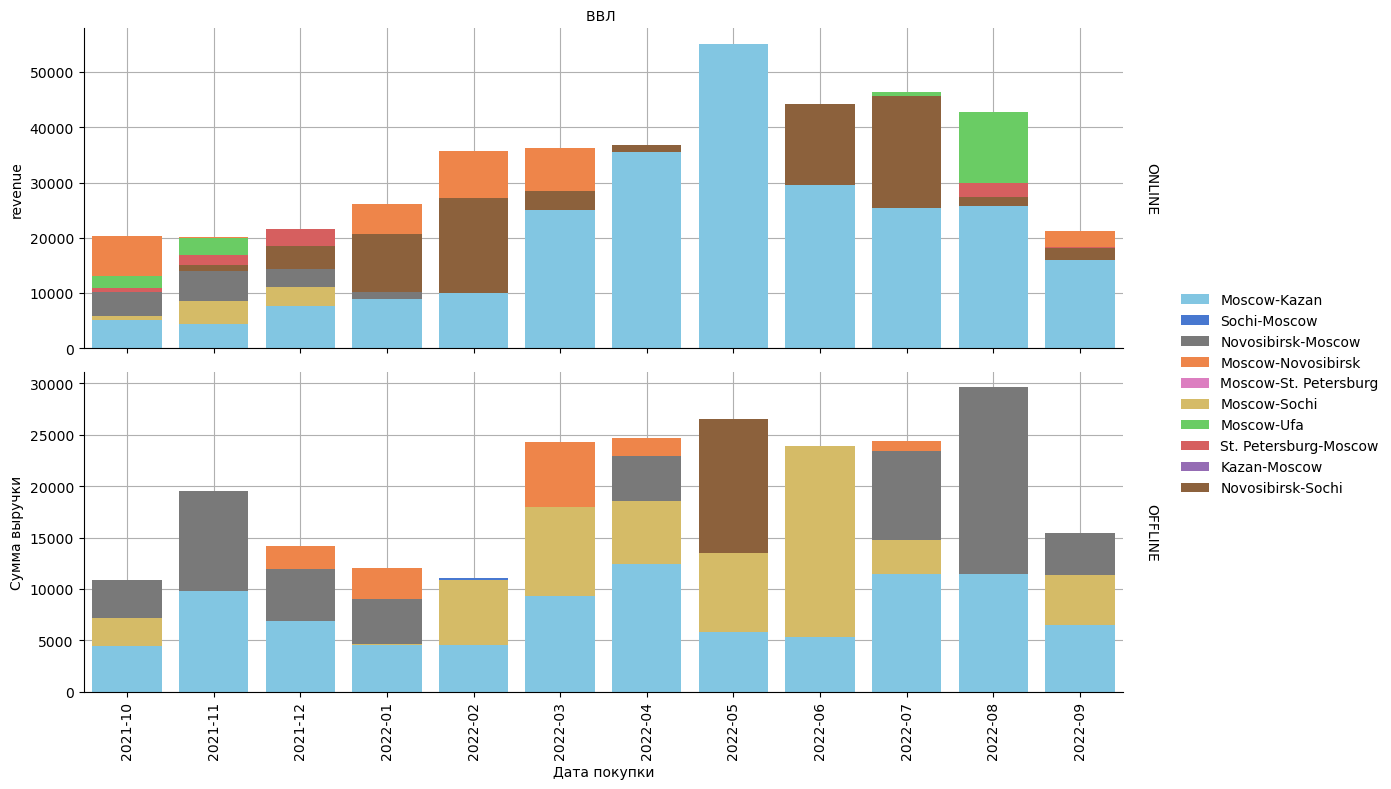

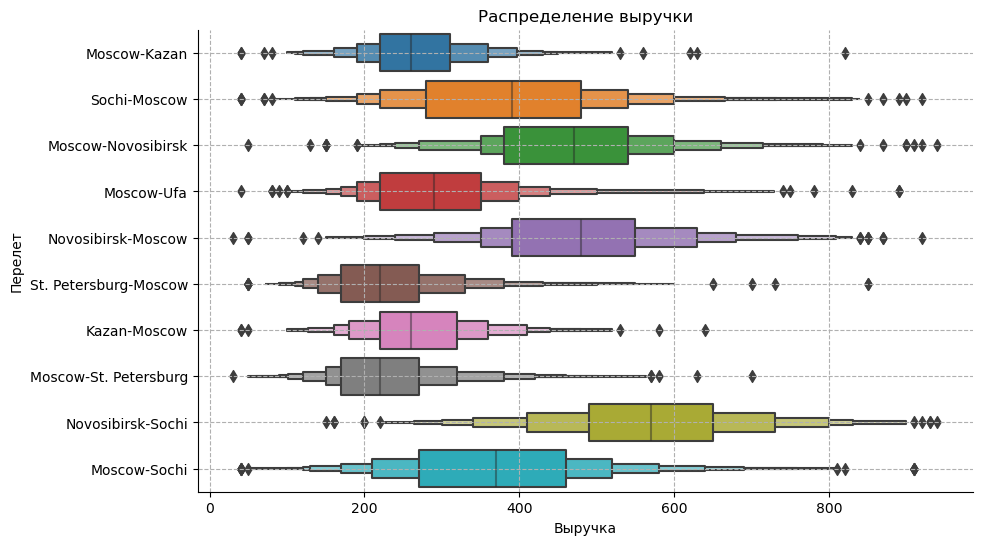

In [217]:
plt.figure(figsize=(11,5))

g1 = sns.FacetGrid(df_clean.query('A_B_city in @df_top.index'), row='sale_type', col='fly_type', margin_titles=True, despine=False, aspect=3, height=4, sharey=False)
plt.xticks(rotation=90)
g1.map_dataframe(sns.barplot, x='to_month', y='revenue', hue='A_B_city', errorbar=None, estimator='sum', palette='muted', dodge=False, saturation=1)
g1.set_titles(col_template='{col_name} ', row_template='{row_name}')
g1.add_legend()
for ax in g1.axes.flat:
    ax.grid(True)
    ax.set_axisbelow(True)
plt.ylabel('Сумма выручки')
plt.xlabel('Дата покупки')
sns.despine()

plt.figure(figsize=(10,6))
sns.boxenplot(df_clean.query('A_B_city in @df_top.index'), x='revenue', y='A_B_city')
plt.title('Распределение выручки')
plt.ylabel('Перелет')
plt.xlabel('Выручка')
plt.grid(linestyle='--')
sns.despine()
plt.show()

## 3.5

### **Что сделал:**

1. Прочитал дополнительный датасет по названиям городов, посмотрел по нему информацию — он качественный, обработки не требует
2. Составил из него словарь
3. Объединив столбцы пункта отправления и назначения, нашёл топ перелётов по типу перелёта
4. С помощью различных строковых методов и функций pandas / merge датафреймов перевёл коды аэропорта в названия городов. Москвы почему‑то не было — пришлось добавить вручную
5. Построил столбчатый график для топ‑10 перелётов в разрезе типа перелёта и типа покупки в динамике
6. Построил ящики с усами для этих топ‑10 перелётов

### **Что получил:**

1. Топ‑10 перелётов оказались внутренними рейсами. Популярность считал относительно количества чеков на данный перелёт
2. Скорее всего, это российский сегмент авиаперелётов, судя по самым частым городам
3. 9 из 10 перелётов включают Москву, и только Новосибирск–Сочи обходится без столицы
4. Внешние самые частые перелёты включают стандартные туристические места отдыха: страны ближнего зарубежья, Турцию, Киргизию
5. По частоте городов после Москвы идёт Новосибирск — возможно, стоит развивать туризм или экономику ещё других городов
6. И в онлайн, и в офлайн покупках по выручке преобладает перелёт Москва–Казань, возможно, из‑за статуса Казани как города студентов
7. Наблюдается явная разница в выручке 2021 и 2022 года в большую сторону для последнего
8. Москва–Казань, Новосибирск–Сочи, Москва–Сочи — самые доходные перелёты, причём офлайн‑покупки для некоторых направлений вообще не представлены
9. Интересный пик — август 2022 для Москва–Уфа
10. Распределение средней выручки за чек, скорее всего, напрямую зависит от дальности перелёта, причём большой разброс хвостов в большинстве случаев включает Москву
11. Для всех перелётов видны выбросы, которые можно считать акциями, скидками и горящими турами
12. Самый высокий средний чек за перелёт — Новосибирск–Сочи, скорее всего из‑за расстояния

In [218]:
df_clean.head()

,buy_date,fly_date,type_pasenger,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff,A_B,A_B_city
46138,2021-10-10,2021-10-19,AD,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9,OVBOSS,Novosibirsk-Osh
43835,2021-10-14,2021-10-23,AD,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9,MOWKZN,Moscow-Kazan
43834,2021-10-13,2021-10-21,AD,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8,MOWSIP,Moscow-Simferopol
43833,2021-10-11,2021-10-18,AD,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7,AERMOW,Sochi-Moscow
43832,2021-10-04,2021-10-06,AD,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2,MOWKRR,Moscow-Krasnodar


In [219]:
df_clean = pd.get_dummies(df_clean, columns=['type_pasenger'], drop_first=True)

In [220]:
df_clean

,buy_date,fly_date,revenue,A_city,B_city,fly_type,loyalty,sale_type,month,to_month,revenue_normalize,season,datediff,A_B,A_B_city,type_pasenger_CHD,type_pasenger_INF
46138,2021-10-10,2021-10-19,440,OVB,OSS,МВЛ,Нет информации,ONLINE,10,2021-10,0.011036,Осень,9,OVBOSS,Novosibirsk-Osh,False,False
43835,2021-10-14,2021-10-23,180,MOW,KZN,ВВЛ,FFP,ONLINE,10,2021-10,-1.200456,Осень,9,MOWKZN,Moscow-Kazan,False,False
43834,2021-10-13,2021-10-21,250,MOW,SIP,ВВЛ,Нет информации,ONLINE,10,2021-10,-0.874285,Осень,8,MOWSIP,Moscow-Simferopol,False,False
43833,2021-10-11,2021-10-18,500,AER,MOW,ВВЛ,Нет информации,OFFLINE,10,2021-10,0.290611,Осень,7,AERMOW,Sochi-Moscow,False,False
43832,2021-10-04,2021-10-06,170,MOW,KRR,ВВЛ,Нет информации,OFFLINE,10,2021-10,-1.247052,Осень,2,MOWKRR,Moscow-Krasnodar,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32035,2022-09-16,2022-10-02,320,MOW,KGD,ВВЛ,Нет информации,ONLINE,9,2022-09,-0.548114,Осень,16,MOWKGD,Moscow-Kaliningrad,False,False
32036,2022-09-17,2022-10-03,480,MOW,NJC,ВВЛ,Нет информации,OFFLINE,9,2022-09,0.197419,Осень,16,MOWNJC,Moscow-Nizhnevartovsk,False,False
18551,2022-09-06,2022-09-11,330,PEZ,MOW,ВВЛ,FFP,ONLINE,9,2022-09,-0.501518,Осень,5,PEZMOW,Penza-Moscow,False,False
18575,2022-09-07,2022-09-24,460,KQT,OVB,МВЛ,Нет информации,ONLINE,9,2022-09,0.104228,Осень,17,KQTOVB,Kurgan Tyube-Novosibirsk,False,False


In [221]:
df_clean.to_pickle('df_clean.pkl')

In [222]:
from scipy import stats

print(stats.pointbiserialr(df_clean['revenue'], df_clean['fly_type'].map({'МВЛ':1,'ВВЛ':0})))
print(stats.pointbiserialr(df_clean['revenue'], df_clean['sale_type'].map({'ONLINE':1,'OFFLINE':0})))
print(stats.pointbiserialr(df_clean['revenue'], df_clean['loyalty'].map({'FFP':1,'Нет информации':0})))


SignificanceResult(statistic=0.10052273676582689, pvalue=7.497357799292165e-109)
SignificanceResult(statistic=-0.16608220975605129, pvalue=3.3984083084435406e-296)
SignificanceResult(statistic=-0.05225228373686102, pvalue=1.317746783925587e-30)


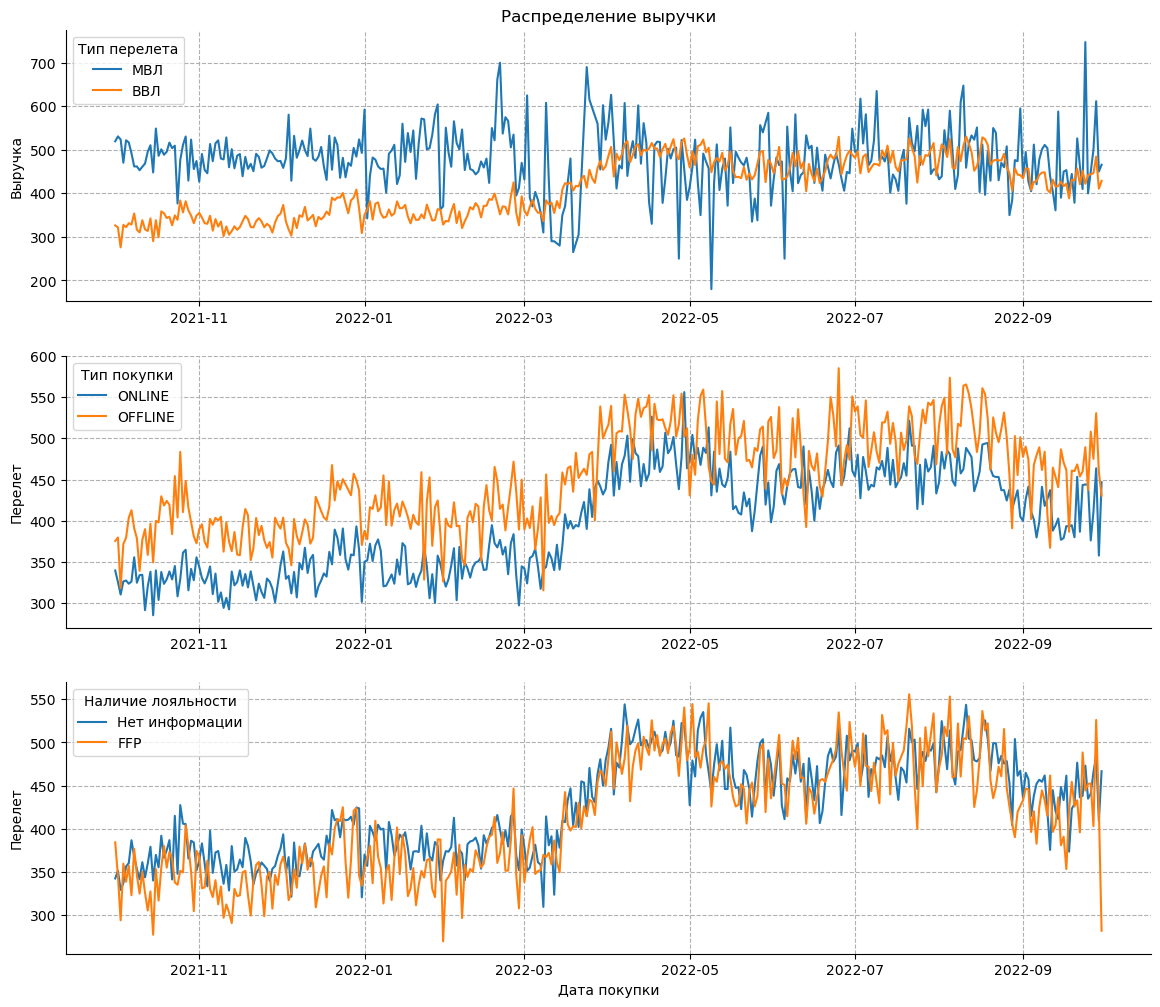

In [223]:
plt.figure(figsize=(14,12))
plt.subplot(3,1,1)
sns.lineplot(df_clean, y='revenue', x='buy_date', hue='fly_type', errorbar=None, sizes=0.6)
plt.title('Распределение выручки')
plt.ylabel('Выручка')
plt.xlabel(None)
plt.legend(title='Тип перелета')
plt.grid(linestyle='--')
sns.despine()

plt.subplot(3,1,2)
sns.lineplot(df_clean, y='revenue', x='buy_date', hue='sale_type', errorbar=None, sizes=0.6)
plt.ylabel('Перелет')
plt.legend(title='Тип покупки')
plt.xlabel(None)
plt.grid(linestyle='--')
sns.despine()

plt.subplot(3,1,3)
sns.lineplot(df_clean, y='revenue', x='buy_date', hue='loyalty', errorbar=None, sizes=0.6)
plt.ylabel('Перелет')
plt.xlabel('Дата покупки')
plt.legend(title='Наличие лояльности')
plt.grid(linestyle='--')
sns.despine()

plt.show()

In [224]:
df_clean = pd.get_dummies(df_clean, columns=['fly_type'], drop_first=True)
df_clean = pd.get_dummies(df_clean, columns=['sale_type'], drop_first=True)
df_clean = pd.get_dummies(df_clean, columns=['loyalty'], drop_first=True)

In [225]:
def full_regression_model(X, Y, test_size=0.2):
    x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=13) # разделяем данные на обучающую и валидационную выборку с random_state=13

    scaler_standart = StandardScaler()
    scaler_normalize = MinMaxScaler()

    x_train_st = scaler_standart.fit_transform(x_train)
    x_train_norm = scaler_normalize.fit_transform(x_train)
    x_test_st = scaler_standart.transform(x_test)
    x_test_norm = scaler_normalize.transform(x_test)

    model_st = LinearRegression()
    model_norm = LinearRegression()
    model_L1 = Ridge()
    model_L2 = Lasso()

    model_st.fit(x_train_st, y_train)
    model_norm.fit(x_train_norm, y_train)

    model_L1.fit(x_train_st, y_train)
    model_L2.fit(x_train_st, y_train)

    y_pred_st = model_st.predict(x_test_st)
    y_pred_norm = model_norm.predict(x_test_norm)
    y_pred_L1 = model_L1.predict(x_test_st)
    y_pred_L2 = model_L2.predict(x_test_st)

    for model in [['парной линейной регрессии с стандартизованными параметрами',model_st, y_pred_st], 
                  ['парной линейной регрессии с нормализованными параметрами',model_norm, y_pred_norm], 
                  ['парной линейной регрессии с Lasso легурязацией и стандартизованными параметрами',model_L2, y_pred_L2],
                  ['парной линейной регрессии с Ridge регуляризацией и стандартизованными параметрами',model_L1, y_pred_L1]]:
        print(60 * '=')
        print('Модель', model[0])
        print(60 * '=')
        print(f' Y = {model[1].intercept_} + X * {model[1].coef_}')
        mse = mean_squared_error(y_test, model[2])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(y_test, model[2])
        mape = mean_absolute_percentage_error(y_test, model[2])
        r2 = r2_score(y_test, model[2])
        print("Среднеквадратическая ошибка (MSE):", mse)
        print("Среднеквадратическая ошибка (RMSE):", rmse)
        print("Средняя абсолютная ошибка (MAE):", mae)
        print("Средняя абсолютная ошибка  (MAPE):", mape)
        print("Коэффициент детерминации (R^2):", r2 )
        print(60 * '=')

In [226]:
full_regression_model(X=df_clean[['type_pasenger_CHD', 'type_pasenger_INF', 'datediff', 'fly_type_МВЛ', 'sale_type_ONLINE']], Y=df_clean['revenue'])

Модель парной линейной регрессии с стандартизованными параметрами
 Y = 421.59638242894056 + X * [-11.84691431 -15.92488287  16.49696873  17.91401147 -28.69636931]
Среднеквадратическая ошибка (MSE): 30240.296404793466
Среднеквадратическая ошибка (RMSE): 173.89737319693322
Средняя абсолютная ошибка (MAE): 140.6102076204873
Средняя абсолютная ошибка  (MAPE): 0.4441177918914256
Коэффициент детерминации (R^2): 0.0523975783916204
Модель парной линейной регрессии с нормализованными параметрами
 Y = 441.9508575481252 + X * [ -46.2115842  -357.37062124  168.24547989   66.78638223  -57.90050076]
Среднеквадратическая ошибка (MSE): 30240.296404793466
Среднеквадратическая ошибка (RMSE): 173.89737319693322
Средняя абсолютная ошибка (MAE): 140.6102076204873
Средняя абсолютная ошибка  (MAPE): 0.4441177918914256
Коэффициент детерминации (R^2): 0.0523975783916204
Модель парной линейной регрессии с Lasso легурязацией и стандартизованными параметрами
 Y = 421.59638242894056 + X * [-10.74170257 -14.8014414

In [227]:
full_regression_model(X=df_corr[['revenue_count']], Y=df_corr['revenue_sum'])

Модель парной линейной регрессии с стандартизованными параметрами
 Y = 1655487.7777777778 + X * [172134.05671608]
Среднеквадратическая ошибка (MSE): 89400447488.8349
Среднеквадратическая ошибка (RMSE): 298999.07606685825
Средняя абсолютная ошибка (MAE): 235365.3780986568
Средняя абсолютная ошибка  (MAPE): 0.12514596056426922
Коэффициент детерминации (R^2): 0.5955950875901548
Модель парной линейной регрессии с нормализованными параметрами
 Y = 1466958.6151095943 + X * [526481.81359552]
Среднеквадратическая ошибка (MSE): 89400447488.83498
Среднеквадратическая ошибка (RMSE): 298999.0760668584
Средняя абсолютная ошибка (MAE): 235365.3780986568
Средняя абсолютная ошибка  (MAPE): 0.12514596056426922
Коэффициент детерминации (R^2): 0.5955950875901546
Модель парной линейной регрессии с Lasso легурязацией и стандартизованными параметрами
 Y = 1655487.7777777778 + X * [172133.05671608]
Среднеквадратическая ошибка (MSE): 89401146871.15451
Среднеквадратическая ошибка (RMSE): 299000.24560383643
Сре

## 3.6

### **Что сделал:**

1. Провёл точечно-биссериальную корреляцию между выручкой и бинарными столбцами-категориями
2. Построил линейные графики для этих показателей
3. Добавил функцию для построения и проверки параметров множественной регрессии с разными условиями
4. Написал собственную функцию для построения моделей множественной регрессии

### **Что получил:**

1. Не стал везде прописывать нулевые гипотезы, потому что видно, что p-value для всех проверок чрезвычайно мал — это говорит о значимости корреляционной связи, но сам коэффициент корреляции для всех случаев очень мал, чтобы судить о линейной зависимости
2. Скорее всего, большое количество наблюдений снижает p-value в любом случае, даже при отсутствии линейной зависимости
3. На графиках же более наглядно можно судить о динамике показателей. Видно, что типы перелёта не особо влияют друг на друга, однако тип покупки и наличие лояльности растут и снижаются достаточно схоже относительно друг друга. Либо это независимые параметры в каждой группе, зависящие сильно от другого фактора (например, временного), либо это всё-таки наличие связи, но не линейной
4. Виден скачок для типа покупки и наличия лояльности с марта по май 2022 года
5. R² у моделей получился очень маленьким — значит, эти регрессии не отражают вариации объясняемой переменной; нужны более прямые факторы влияния на стоимость билета

## Выводы

1. Датасет был достаточно чистым и обработанным — по итогу первичной обработки смогли оставить 98% строк
2. По построенным общим графикам и сводным таблицам можно сделать множество сравнений и найти нужные показатели за нужный период
3. Работа с выбросами сильно зависит от критичности потери информации — в этом моменте нужно искать золотую середину
4. Гипотезы — достаточно мощный инструмент, но, скорее всего, сильно зависят от количества данных. Билеты, купленные сильно заранее, статистически дешевле других категорий
5. Из перелётов можно также сделать большое количество выводов и извлечь множество информации в зависимости от цели; Новосибирск и Москва являются ключевыми пунктами по количеству перелётов
6. Явную корреляцию между выручкой и неколичественными показателями выявить не удалось